In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
# Define dataset paths
train_dir = 'dataset/Lung_Cancer_Dataset/train'
test_dir = 'dataset/Lung_Cancer_Dataset/test'

In [9]:
# Load and preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 364 images belonging to 2 classes.
Found 190 images belonging to 2 classes.


In [10]:
from tensorflow.keras import layers, models, optimizers

# Build CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // 32)


Epoch 1/10
11/11 [==============================] - 14s 1s/step - loss: 0.6156 - accuracy: 0.6476 - val_loss: 0.4202 - val_accuracy: 0.8375
Epoch 2/10
11/11 [==============================] - 8s 754ms/step - loss: 0.3597 - accuracy: 0.8807 - val_loss: 0.1910 - val_accuracy: 0.9688
Epoch 3/10
11/11 [==============================] - 8s 711ms/step - loss: 0.2353 - accuracy: 0.9127 - val_loss: 0.1168 - val_accuracy: 0.9688
Epoch 4/10
11/11 [==============================] - 8s 712ms/step - loss: 0.1566 - accuracy: 0.9488 - val_loss: 0.0762 - val_accuracy: 0.9750
Epoch 5/10
11/11 [==============================] - 9s 781ms/step - loss: 0.1253 - accuracy: 0.9639 - val_loss: 0.0499 - val_accuracy: 0.9875
Epoch 6/10
11/11 [==============================] - 8s 741ms/step - loss: 0.0933 - accuracy: 0.9639 - val_loss: 0.0355 - val_accuracy: 0.9937
Epoch 7/10
11/11 [==============================] - 8s 767ms/step - loss: 0.0522 - accuracy: 0.9849 - val_loss: 0.0216 - val_accuracy: 0.9937
Epoch 8/

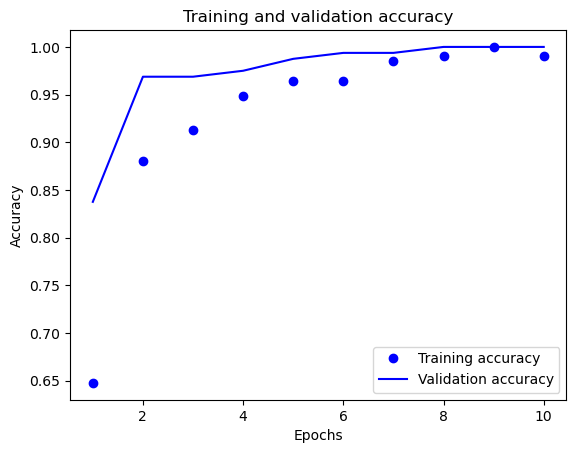

In [16]:
# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




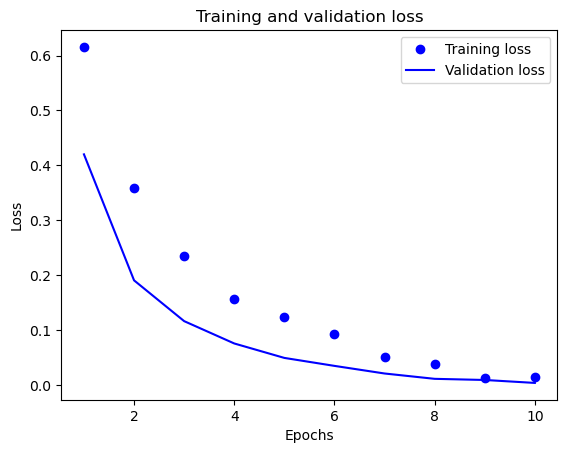

In [17]:
# Plot training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [19]:
 #Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // 32)
print('Test accuracy:', test_acc)

5/5 [==============================] - 1s 192ms/step - loss: 0.0040 - accuracy: 1.0000
Test accuracy: 1.0
